In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

## Carregando dados

In [2]:
df = pd.read_csv(r'C:\Users\nikbr\Documents\DatasetsEstudo\CarsDatasets2025.csv', encoding='latin1')

## Análise Exploratória

In [3]:
df.head()

Company Names     Cars Names      Engines CC/Battery Capacity HorsePower  \
0       FERRARI  SF90 STRADALE           V8             3990 cc     963 hp   
1   ROLLS ROYCE        PHANTOM          V12             6749 cc     563 hp   
2          Ford            KA+  1.2L Petrol            1,200 cc   70-85 hp   
3      MERCEDES        GT 63 S           V8            3,982 cc     630 hp   
4          AUDI     AUDI R8 Gt          V10            5,204 cc     602 hp   

  Total Speed Performance(0 - 100 )KM/H      Cars Prices       Fuel Types  \
0    340 km/h                   2.5 sec      $1,100,000   plug in hyrbrid   
1    250 km/h                   5.3 sec        $460,000            Petrol   
2    165 km/h                  10.5 sec  $12,000-$15,000           Petrol   
3    250 km/h                   3.2 sec        $161,000            Petrol   
4    320 km/h                   3.6 sec        $253,290            Petrol   

  Seats        Torque  
0     2        800 Nm  
1     5        900 Nm  
2     5  100 - 140 Nm  
3     4        900 Nm  
4     2        560 Nm

In [4]:
df.shape

(1218, 11)

In [5]:
colunas = df.columns
colunas

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque'],
      dtype='object')

In [6]:
df.count()

Company Names                1218
Cars Names                   1218
Engines                      1218
CC/Battery Capacity          1215
HorsePower                   1218
Total Speed                  1218
Performance(0 - 100 )KM/H    1212
Cars Prices                  1218
Fuel Types                   1218
Seats                        1218
Torque                       1217
dtype: int64

In [7]:
df.isna().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(4)

In [9]:
df.dtypes

Company Names                object
Cars Names                   object
Engines                      object
CC/Battery Capacity          object
HorsePower                   object
Total Speed                  object
Performance(0 - 100 )KM/H    object
Cars Prices                  object
Fuel Types                   object
Seats                        object
Torque                       object
dtype: object

In [10]:
for col in df.columns:
    print(f"\n===== Value Counts for '{col}' =====")
    print(df[col].value_counts(dropna=False)) 
    print(f"Total unique values: {df[col].nunique()}")


===== Value Counts for 'Company Names' =====
Company Names
Nissan               149
Volkswagen           109
Porsche               96
Mazda                 87
Mitsubishi            60
GMC                   59
Chevrolet             58
Peugeot               54
Kia                   54
Ford                  54
TOYOTA                45
BMW                   41
Jaguar Land Rover     40
Tata Motors           29
ROLLS ROYCE           29
Acura                 27
LAMBORGHINI           24
HYUNDAI               23
MERCEDES              21
AUDI                  21
Cadillac              20
Jeep                  19
KIA                   16
ASTON MARTIN          11
Tesla                 10
NISSAN                10
Bugatti               10
FERRARI                9
Volvo                  9
HONDA                  7
Toyota                 5
MARUTI SUZUKI          3
VOLVO                  3
MAHINDRA               3
KIA                    1
BENTLEY                1
ROLLS ROYCE            1
Name: count, dt

## Pré-Processamento

In [11]:
def formatacao_float(x):
    if pd.isna(x):
        return ''
    return f'{x:.10f}'.rstrip('0').rstrip('.')

In [12]:
pd.options.display.float_format = formatacao_float

In [13]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [14]:
nanlines = df.index[df.isna().any(axis=1)]
nanlines

Index([97, 241, 255, 1092, 1103, 1104, 1122, 1143], dtype='int64')

In [15]:
df.dropna(inplace=True)

In [16]:
df['Fuel Types'] = df['Fuel Types'].str.lower().str.strip()
df['Fuel Types'] = df['Fuel Types'].replace({
    'petrol/diesel':'petrol & diesel',
    'petrol/hybrid':'hybrid',
    'hybrid (petrol)': 'hybrid',
    'diesel/petrol': 'petrol & diesel',
    'petrol, diesel': 'petrol & diesel',
    'petrol, hybrid': 'hybrid',
    'petrol/awd' : 'petrol',
    'plug in hyrbrid': 'plug-in hybrid',
    'hybrid/electric': 'hybrid',
    'petrol/ev': 'hybrid',
    'cng/petrol': 'cng',
    'hybrid/petrol': 'hybrid',
    'diesel hybrid': 'hybrid',
    'petrol (hybrid)': 'hybrid',
    'hybrid (gas + electric)': 'hybrid',
    'gas / hybrid': 'hybrid',
    'hybrid / plug-in': 'plug-in hybrid'
})

In [17]:
def parse_prices(value):
    if isinstance(value, str):
        nums = re.findall(r'\d[\d,]*', value)
        if len(nums)==1:
            return float(nums[0].replace(',',''))
        elif len(nums)==2:
            return (float(nums[0].replace(',',''))+float(nums[1].replace(',','')))/2
    return np.nan

df['Price_USD'] = df['Cars Prices'].apply(parse_prices)

In [18]:
df['HorsePower_cleaned'] = df['HorsePower'].str.lower().str.extract(r'(\d+)').astype(float)
df['TopSpeed_kmh'] = df['Total Speed'].str.lower().str.extract(r'(\d+)').astype(float)
df['(0-100khm) sec'] = df['Performance(0 - 100 )KM/H'].str.lower().str.extract(r'([\d\.]+)').astype(float)
df['CC_clean'] = df['CC/Battery Capacity'].str.lower().str.replace(',', '').str.extract(r'(\d+)').astype(float)
df['Torque_Nm'] = df['Torque'].str.lower().str.extract(r'(\d+)').astype(float)
df['Company Names'] = df['Company Names'].str.strip().str.title()
df['Cars Names'] = df['Cars Names'].str.strip().str.title()

In [19]:
def parse_seats(val):
    try:
        if isinstance(val, str):
            nums = [int(s) for s in re.findall(r'\d+', val)]
            if len(nums) == 1:
                return nums[0]
            elif len(nums) >= 2:
                return sum(nums)
        return int(val)
    except:
        return np.nan

df['Seats_clean'] = df['Seats'].apply(parse_seats)

In [20]:
df_cleaned = df[[
    'Company Names', 'Cars Names', 'Engines', 'Fuel Types',
    'CC_clean', 'HorsePower_cleaned', 'TopSpeed_kmh', '(0-100khm) sec',
    'Price_USD', 'Torque_Nm', 'Seats_clean'
]].copy()

df_cleaned.rename(columns={
    'CC_clean': 'Engine_CC',
    'HorsePower_cleaned': 'HorsePower_hp',
    'TopSpeed_kmh': 'TopSpeed_kmh',
    '(0-100khm) sec': '(0-100khm) sec',
    'Torque_Nm': 'Torque_Nm',
    'Seats_clean': 'Seats'
}, inplace=True)

In [21]:
df_cleaned.head(10)

Company Names            Cars Names      Engines      Fuel Types  Engine_CC  \
0       Ferrari         Sf90 Stradale           V8  plug-in hybrid       3990   
1   Rolls Royce               Phantom          V12          petrol       6749   
2          Ford                   Ka+  1.2L Petrol          petrol       1200   
3      Mercedes               Gt 63 S           V8          petrol       3982   
4          Audi            Audi R8 Gt          V10          petrol       5204   
5           Bmw          Mclaren 720S           V8          petrol       3994   
6  Aston Martin            Vantage F1           V8          petrol       3982   
7       Bentley  Continental Gt Azure           V8          petrol       3996   
8   Lamborghini       Veneno Roadster          V12          petrol       6498   
9       Ferrari            F8 Tributo           V8          petrol       3900   

   HorsePower_hp  TopSpeed_kmh  (0-100khm) sec  Price_USD  Torque_Nm  Seats  
0            963           340             2.5    1100000        800      2  
1            563           250             5.3     460000        900      5  
2             70           165            10.5      13500        100      5  
3            630           250             3.2     161000        900      4  
4            602           320             3.6     253290        560      2  
5            710           341             2.9     499000        770      2  
6            656           314             3.6     193440        685      2  
7            550           318               4     311000        900      4  
8            750           356             2.9    4500000        690      2  
9            710           340             2.9     280000        770      2

In [22]:
print(df_cleaned[['Company Names', 'Cars Names']].value_counts(dropna=False))
print(df_cleaned[['Company Names', 'Cars Names']].nunique())

Company Names  Cars Names    
Ford           Ka+               2
Chevrolet      Malibu Premier    2
Hyundai        Elantra           2
Nissan         200Sx             2
               Nx Coupe          2
                                ..
Volkswagen     Touareg V8        1
               Transporter       1
               Up!               1
               Up! Cabriolet     1
Acura          Mdx Sh-Awd        1
Name: count, Length: 1192, dtype: int64
Company Names      31
Cars Names       1191
dtype: int64


## Problemas de Negócios

## Análise de Preço e Desempenho: 

## Custo-Benefício: Qual marca ou modelo oferece a melhor relação entre desempenho e preço?

## Marcas com melhor custo-benefício

In [23]:
df_cleaned['Power Metric'] = df_cleaned['HorsePower_hp'] + df_cleaned['Torque_Nm']
df_cleaned['Cost-Benefit'] = df_cleaned['Power Metric'] / df_cleaned['Price_USD'] 

melhores_marcas = df_cleaned.groupby('Company Names')['Cost-Benefit'].sum().sort_values(ascending=False)

melhores_marcas.head(10)

Company Names
Nissan       2.3104514569
Volkswagen    1.481701045
Mazda        1.2551547031
Kia          1.0478654889
Chevrolet     1.011014628
Gmc          0.8540337952
Ford         0.8231096973
Porsche      0.8202537133
Mitsubishi    0.771118964
Toyota       0.7395265525
Name: Cost-Benefit, dtype: float64

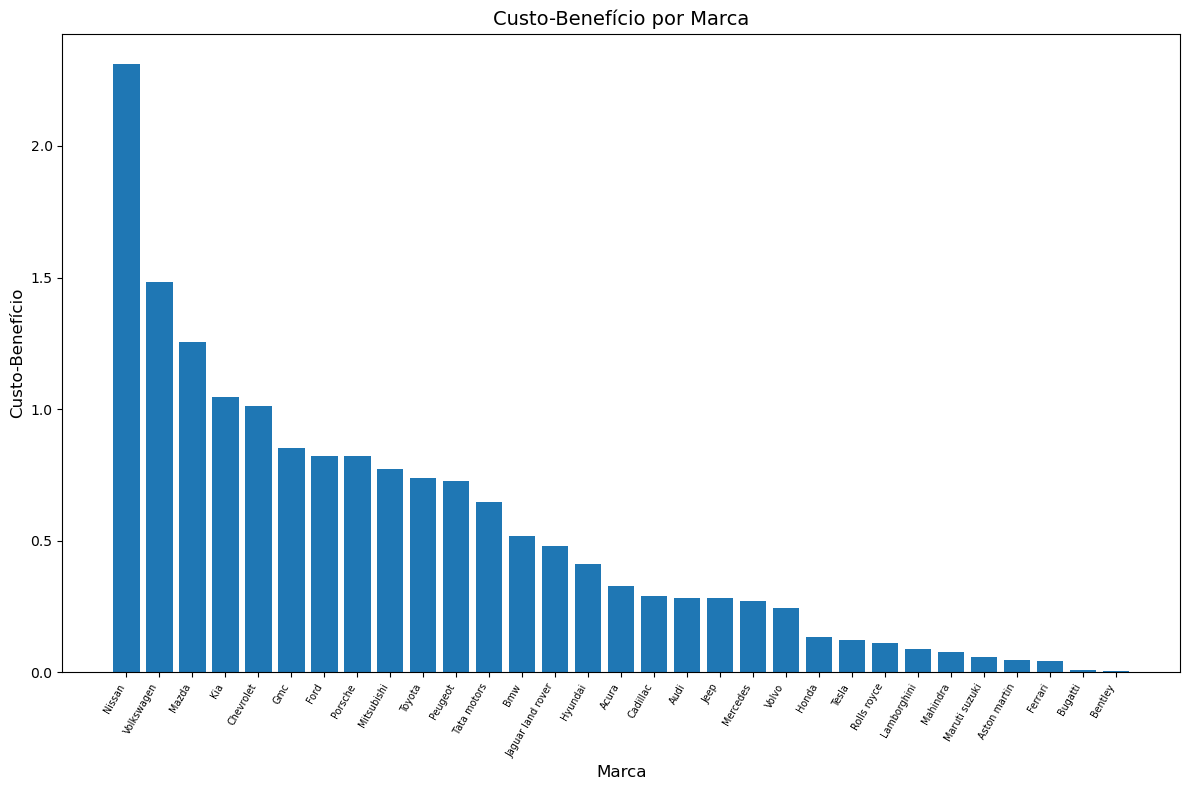

In [24]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x = melhores_marcas.index.str.capitalize(), height = melhores_marcas.values)
ax.set_title('Custo-Benefício por Marca', fontsize = 14)
ax.set_xlabel('Marca', fontsize = 12)
ax.set_ylabel('Custo-Benefício', fontsize = 12)

plt.xticks(rotation = 60, fontsize = 'x-small', ha='right')
plt.tight_layout()
plt.show()

## Modelos com melhor custo-benefício

In [25]:
melhores_modelos = df_cleaned.groupby('Cars Names')['Cost-Benefit'].sum().sort_values(ascending=False)

melhores_modelos.head(10)

Cars Names
Elantra                              0.0414758363
Silverado 3500Hd                     0.0369010989
Malibu Premier                       0.0354782609
Sierra 3500Hd                        0.0342653061
200Sx                                      0.0339
Indica Ev2                           0.0338709677
Indica V2 Xeta                              0.033
Nx Coupe                             0.0323232323
Indigo Ecs                           0.0323076923
508 Pse (Peugeot Sport Engineered)          0.032
Name: Cost-Benefit, dtype: float64

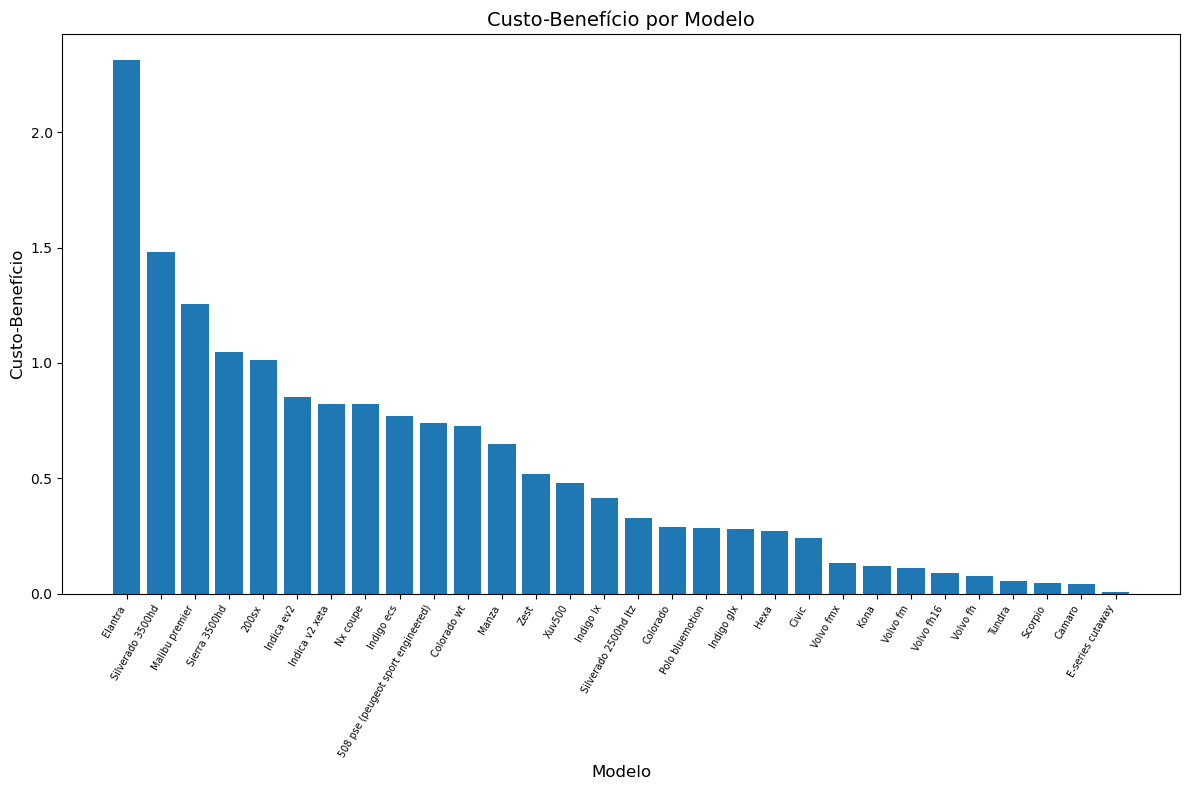

In [26]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x = melhores_modelos.head(30).index.str.capitalize(), height = melhores_marcas.head(30).values)
ax.set_title('Custo-Benefício por Modelo', fontsize = 14)
ax.set_xlabel('Modelo', fontsize = 12)
ax.set_ylabel('Custo-Benefício', fontsize = 12)

plt.xticks(rotation = 60, fontsize = 'x-small', ha='right')
plt.tight_layout()
plt.show()

## Relação performance e preço de um veículo

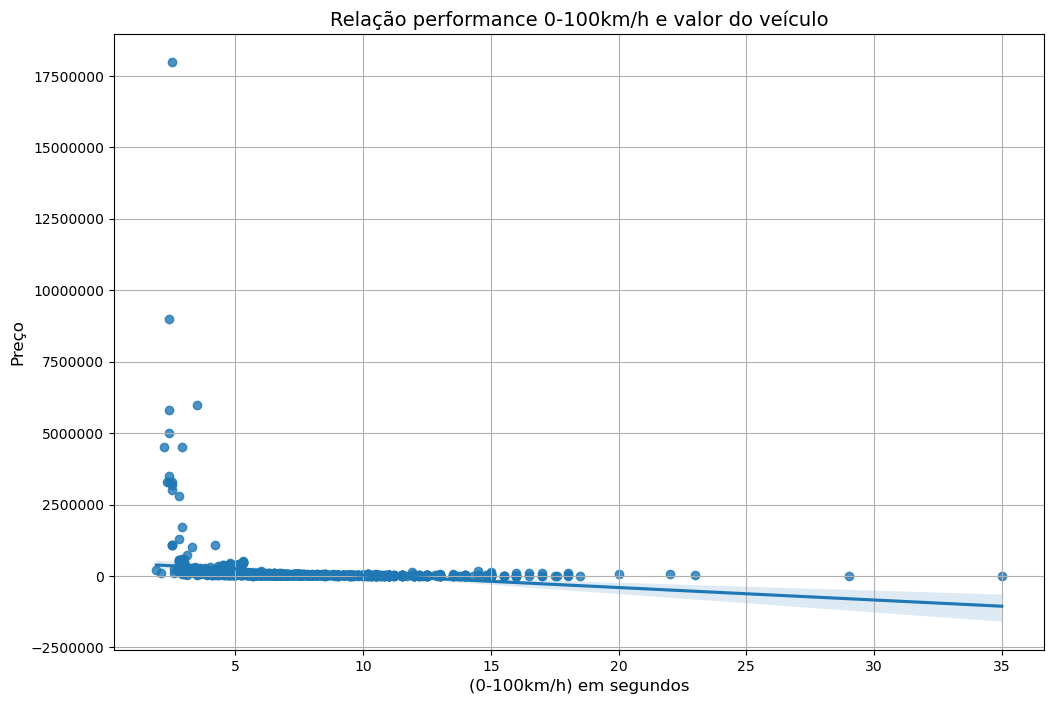

In [27]:
fig, ax = plt.subplots(figsize=(12,8))

sns.regplot(x = df_cleaned['(0-100khm) sec'], y = df_cleaned['Price_USD'])
ax.set_title('Relação performance 0-100km/h e valor do veículo', fontsize = 14)
ax.set_xlabel('(0-100km/h) em segundos', fontsize = 12)
ax.set_ylabel('Preço', fontsize = 12)
ax.ticklabel_format(style='plain', axis='y')
plt.grid(True)

plt.show()

In [28]:
df_cleaned['Price_USD'].idxmax()
df_cleaned.loc[883]

Company Names                 Bugatti
Cars Names           La Voiture Noire
Engines           8.0L Quad-Turbo W16
Fuel Types                     petrol
Engine_CC                        7993
HorsePower_hp                    1500
TopSpeed_kmh                      420
(0-100khm) sec                    2.5
Price_USD                    18000000
Torque_Nm                        1600
Seats                               2
Power Metric                     3100
Cost-Benefit             0.0001722222
Name: 883, dtype: object

In [29]:
corr_performance_preco = df_cleaned['(0-100khm) sec'].corr(df_cleaned['Price_USD'])
float(corr_performance_preco)

-0.2018415309045095

## Relação top speed e preço de um veículo

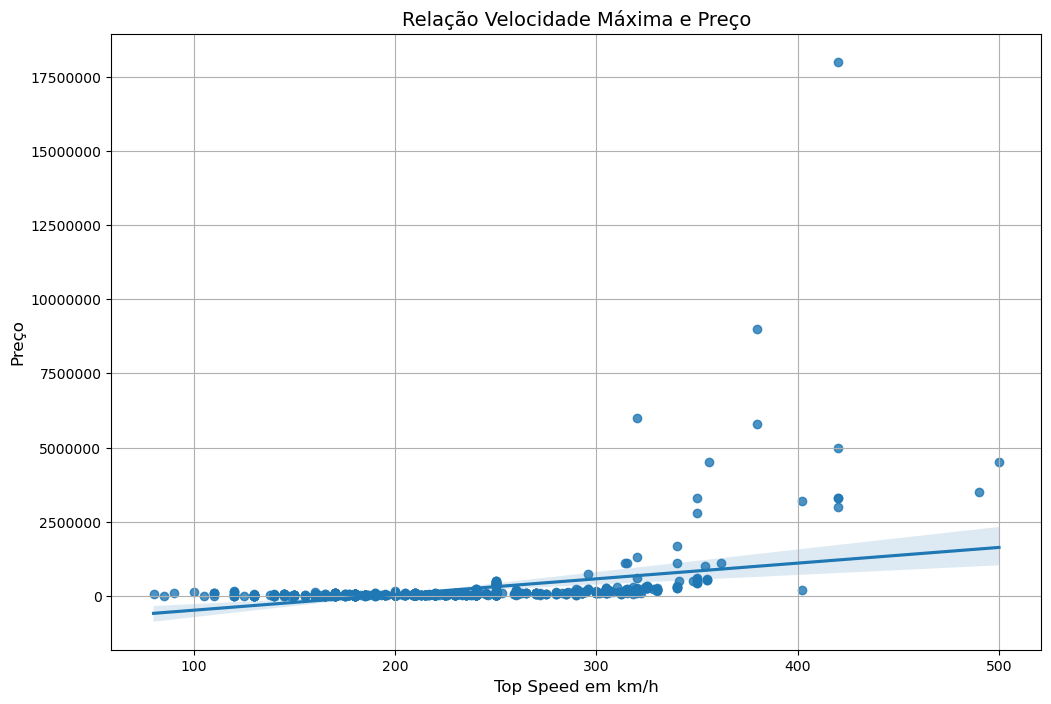

In [30]:
fig, ax = plt.subplots(figsize = (12,8))

sns.regplot(x = df_cleaned['TopSpeed_kmh'], y = df_cleaned['Price_USD'])
ax.set_title('Relação Velocidade Máxima e Preço', fontsize = 14)
ax.set_xlabel('Top Speed em km/h', fontsize = 12)
ax.set_ylabel('Preço', fontsize = 12)
ax.ticklabel_format(style='plain', axis='y')
plt.grid(True)

plt.show()

In [31]:
df_cleaned['TopSpeed_kmh'].idxmax()
df_cleaned.loc[884]

Company Names                 Bugatti
Cars Names                     Bolide
Engines           8.0L Quad-Turbo W16
Fuel Types                     petrol
Engine_CC                        7993
HorsePower_hp                    1850
TopSpeed_kmh                      500
(0-100khm) sec                    2.2
Price_USD                     4500000
Torque_Nm                        1600
Seats                               2
Power Metric                     3450
Cost-Benefit             0.0007666667
Name: 884, dtype: object

In [32]:
corr_velocidademax_preco = df_cleaned['TopSpeed_kmh'].corr(df_cleaned['Price_USD'])
float(corr_velocidademax_preco)

0.39034808718741376

## Análise de Marcas e Segmentos

## Comparação Média entre Marcas: 

## Preço:

In [33]:
precomedio_marcas = df_cleaned.groupby('Company Names')['Price_USD'].describe()
precomedio_marcas

count              mean                std     min  \
Company Names                                                           
Acura                 27  63259.2592592593   40223.9811675655   28000   
Aston Martin          11 752949.0909090909  921640.0796998203  142000   
Audi                  21  82870.9523809524   52775.6261833777   35000   
Bentley                1            311000                NaN  311000   
Bmw                   41  67317.0731707317   78310.1012080786   26000   
Bugatti               10           5870000 4633705.0210627588 3000000   
Cadillac              20           62178.5   28074.2050128808   34395   
Chevrolet             57  44627.1929824561   17954.4572166422   14395   
Ferrari                9 512222.2222222222  526896.0470951025  210000   
Ford                  54  53457.6851851852   64226.9966948961   13500   
Gmc                   59  63293.4745762712   23575.0633753168   28700   
Honda                  7  29364.2857142857   10100.9370145264   15400   
Hyundai               23  31495.6086956522   14610.4818498698   12400   
Jaguar Land Rover     40             72125   19144.7756815648   40000   
Jeep                  19  51439.2105263158   17945.8804668646   28345   
Kia                   71  36014.0845070423   12079.4902420194   17000   
Lamborghini           24 650083.3333333334  965770.7855101681  211000   
Mahindra               3             18400               2000   16400   
Maruti Suzuki          3  12066.6666666667    2081.6659994661   10400   
Mazda                 86  93825.5813953488  644444.0639599276    9000   
Mercedes              20             83300    41414.591885622   46000   
Mitsubishi            56  27446.4285714286    9694.7401725362   11000   
Nissan               158  59392.0253164557  125525.9332190829   10000   
Peugeot               54  35416.6666666667    9537.7848383491   20000   
Porsche               96 138389.5833333333   83943.5414639433   58000   
Rolls Royce           30            390400    56192.157999935  320000   
Tata Motors           28  12507.1428571429    6120.5136900989    4000   
Tesla                 10             87032   47818.4478116042   40240   
Toyota                49  41855.1530612245   22883.9251054379   18000   
Volkswagen           107  36437.7102803738   17754.7378646289   12000   
Volvo                 12  97083.3333333333   31798.9660590442   55000   

                       25%     50%      75%      max  
Company Names                                         
Acura                45000   50000    56500   157000  
Aston Martin        200720  294000  1100000  3200000  
Audi                 52000   64000    96000   253290  
Bentley             311000  311000   311000   311000  
Bmw                  34000   39000    76000   499000  
Bugatti            3300000 4000000  5600000 18000000  
Cadillac          43493.75   54095 68566.25   149990  
Chevrolet            29200   43500    61595    82400  
Ferrari             230000  280000   350000  1700000  
Ford                 32000 44227.5 58481.25   500000  
Gmc                  43900   60000  77402.5   112700  
Honda                23375   29400    35000    44000  
Hyundai              18700   25000    41225    55000  
Jaguar Land Rover    58750   67500    85000   120000  
Jeep                 40035   44500    61730    91495  
Kia                  26750   34500    45750    65000  
Lamborghini         270500  334500   545000  4500000  
Mahindra             17400   18400    19400    20400  
Maruti Suzuki        10900   11400    12900    14400  
Mazda                16500   22500    30375  6000000  
Mercedes             53000   66500   105250   200000  
Mitsubishi           21125   27250    32500    47500  
Nissan               22000   35000    54000  1100000  
Peugeot              28000   35000    40000    60000  
Porsche              90875  113300   171300   750000  
Rolls Royce         349250  377500   420250   515000  
Tata Motors           8275   10750    15375    25500  
Tesla         

<function matplotlib.pyplot.show(close=None, block=None)>

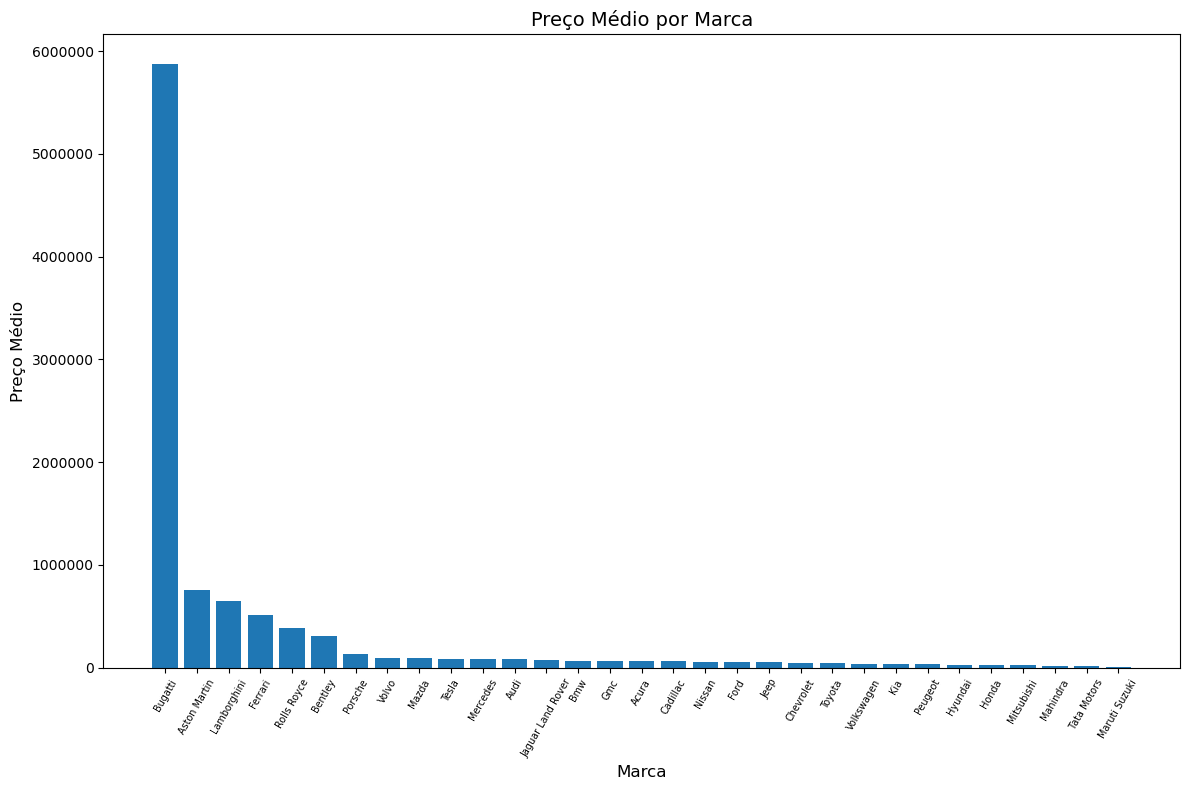

In [34]:
df_precomedio_marcas = precomedio_marcas['mean'].sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (12,8))

ax.bar(df_precomedio_marcas.index, df_precomedio_marcas.values)
ax.set_xlabel('Marca', fontsize = 12)
ax.set_ylabel('Preço Médio', fontsize = 12)
ax.set_title('Preço Médio por Marca', fontsize = 14)

plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 60, fontsize = 'x-small', )
plt.tight_layout()
plt.show

## Potência: Horse Power e Torque

In [35]:
hpmedio_marcas = df_cleaned.groupby('Company Names')['HorsePower_hp'].describe()
hpmedio_marcas

count           mean            std  min    25%   50%  \
Company Names                                                              
Acura                 27  311.037037037 107.1707772603  201    272   290   
Aston Martin          11 701.0909090909 212.2302780215  503    561   600   
Audi                  21 393.1904761905 133.9957533087  248    306   349   
Bentley                1            550            NaN  550    550   550   
Bmw                   41 274.5365853659 176.0660525997   95    136   190   
Bugatti               10           1565 110.6797181059 1500   1500  1500   
Cadillac              20          368.4 131.5380273213  235 291.75 332.5   
Chevrolet             57 302.7719298246 118.8065681121   98    200   310   
Ferrari                9 709.8888888889 122.0793230286  592    612   710   
Ford                  54 300.7592592593 149.3437133728   70  183.5 283.5   
Gmc                   59 364.6779661017 165.5758437194    1    309   355   
Honda                  7 205.5714285714  69.6679197882  119    169   190   
Hyundai               23 198.1739130435  71.1602878104   87    147   187   
Jaguar Land Rover     40        354.525  110.018643525  160  287.5   340   
Jeep                  19 318.8947368421 108.9249969968  177    255   285   
Kia                   71 216.2816901408  76.0391220921  120    147   187   
Lamborghini           24 691.5416666667  65.9558344762  610    640   656   
Mahindra               3 148.3333333333   7.6376261583  140    145   150   
Maruti Suzuki          3  89.6666666667  11.5470053838   83     83    83   
Mazda                 86 154.6860465116  84.2683754271   26    110 136.5   
Mercedes              20         416.95 122.1635982478  255    362   402   
Mitsubishi            56 146.1071428571  51.9218568695   48  112.5   148   
Nissan               158 246.9493670886 136.3964714352   48  131.5   204   
Peugeot               54 180.1296296296   78.337211644   75    130 152.5   
Porsche               96 463.2604166667 122.8423246787  261    375   454   
Rolls Royce           30            584   27.697877424  563    563   563   
Tata Motors           28  96.3571428571    33.27351776   37     74    86   
Tesla                 10          360.6 295.7552291263    1   71.5   365   
Toyota                49 232.6326530612  88.1104169678   71    159   220   
Volkswagen           107 169.5327102804  74.3218799848   34    115   150   
Volvo                 12         408.25 163.9085803955  180 271.75   430   

                     75%  max  
Company Names                  
Acura              305.5  600  
Aston Martin       775.5 1160  
Audi                 563  610  
Bentley              550  550  
Bmw                  444  710  
Bugatti             1600 1850  
Cadillac             420  682  
Chevrolet            355  650  
Ferrari              789  963  
Ford                 400  760  
Gmc                  420  830  
Honda              238.5  315  
Hyundai            276.5  320  
Jaguar Land Rover    400  575  
Jeep                 375  600  
Kia                283.5  577  
Lamborghini          759  819  
Mahindra           152.5  155  
Maruti Suzuki         93  103  
Mazda                187  700  
Mercedes          445.75  630  
Mitsubishi           181  291  
Nissan            368.75  720  
Peugeot           220.75  360  
Porsche           543.25  750  
Rolls Royce          623  624  
Tata Motors          118  168  
Tesla                615  800  
Toyota               296  437  
Volkswagen           204  462  
Volvo                500  750

In [36]:
torquemedio_marcas = df_cleaned.groupby('Company Names')['Torque_Nm'].describe()
torquemedio_marcas

count           mean             std  min    25%   50%  \
Company Names                                                               
Acura                 27 384.1851851852  137.3331258815  180  348.5   362   
Aston Martin          11 752.8181818182  130.0398540308  630  657.5   700   
Audi                  21 571.3333333333  127.7956702449  400    500   560   
Bentley                1            900             NaN  900    900   900   
Bmw                   41 422.6829268293  182.8527329608  200    270   400   
Bugatti               10           1600               0 1600   1600  1600   
Cadillac              20         500.85  172.8736304509  350    362   440   
Chevrolet             57 472.3684210526  239.2071451079  127    353   413   
Ferrari                9 757.4444444444    25.461299609  718    760   760   
Ford                  54            415  232.8139592521    1 213.75   405   
Gmc                   59  485.406779661  258.7781048301    1    358   519   
Honda                  7 339.2857142857    92.845237332  145    330   370   
Hyundai               23  314.347826087   85.1568652523  120    250   320   
Jaguar Land Rover     40        504.375  136.4747910412  215    400   450   
Jeep                  19 437.7368421053  171.4188638995  230    322   353   
Kia                   71 307.3098591549  102.1780786595  151    250   350   
Lamborghini           24 687.0833333333   94.4655063188  560    600   690   
Mahindra               3 333.3333333333   61.1010092661  280    300   320   
Maruti Suzuki          3            142   50.2294734195  113    113   113   
Mazda                 86 211.9534883721   99.8443384918   45    142 188.5   
Mercedes              20            618  164.1116436422  500    500   510   
Mitsubishi            56 240.4107142857  121.6374309593   60    154   208   
Nissan               158 338.8544303797  161.5041884235   62    192 322.5   
Peugeot               54 301.1111111111  100.8205329991  115    240   260   
Porsche               96 582.3333333333  166.5114926754  344    450   550   
Rolls Royce           30            862   30.1032705292  800    850   860   
Tata Motors           28 176.9642857143   90.4501017107   51    113   140   
Tesla                 10          408.4  390.8481376016    1   3.25   459   
Toyota                49 364.7142857143  155.6265562171   93    250   360   
Volkswagen           107 309.5700934579  118.0329432868   93    250   310   
Volvo                 12           1725 1053.2417489913  400    700  2000   

                     75%  max  
Company Names                  
Acura                400  666  
Aston Martin       860.5 1000  
Audi                 650  800  
Bentley              900  900  
Bmw                  570  770  
Bugatti             1600 1600  
Cadillac             621  893  
Chevrolet            583 1234  
Ferrari              770  800  
Ford              569.75 1051  
Gmc                  624 1234  
Honda                400  400  
Hyundai              400  420  
Jaguar Land Rover    680  700  
Jeep               582.5  850  
Kia                  355  740  
Lamborghini          720  850  
Mahindra             360  400  
Maruti Suzuki      156.5  200  
Mazda                260  500  
Mercedes             700 1000  
Mitsubishi        347.25  441  
Nissan               469  780  
Peugeot            357.5  520  
Porsche              700 1050  
Rolls Royce        892.5  900  
Tata Motors       246.25  400  
Tesla             634.75  967  
Toyota               450  750  
Volkswagen           350  770  
Volvo               2500 3500

<function matplotlib.pyplot.show(close=None, block=None)>

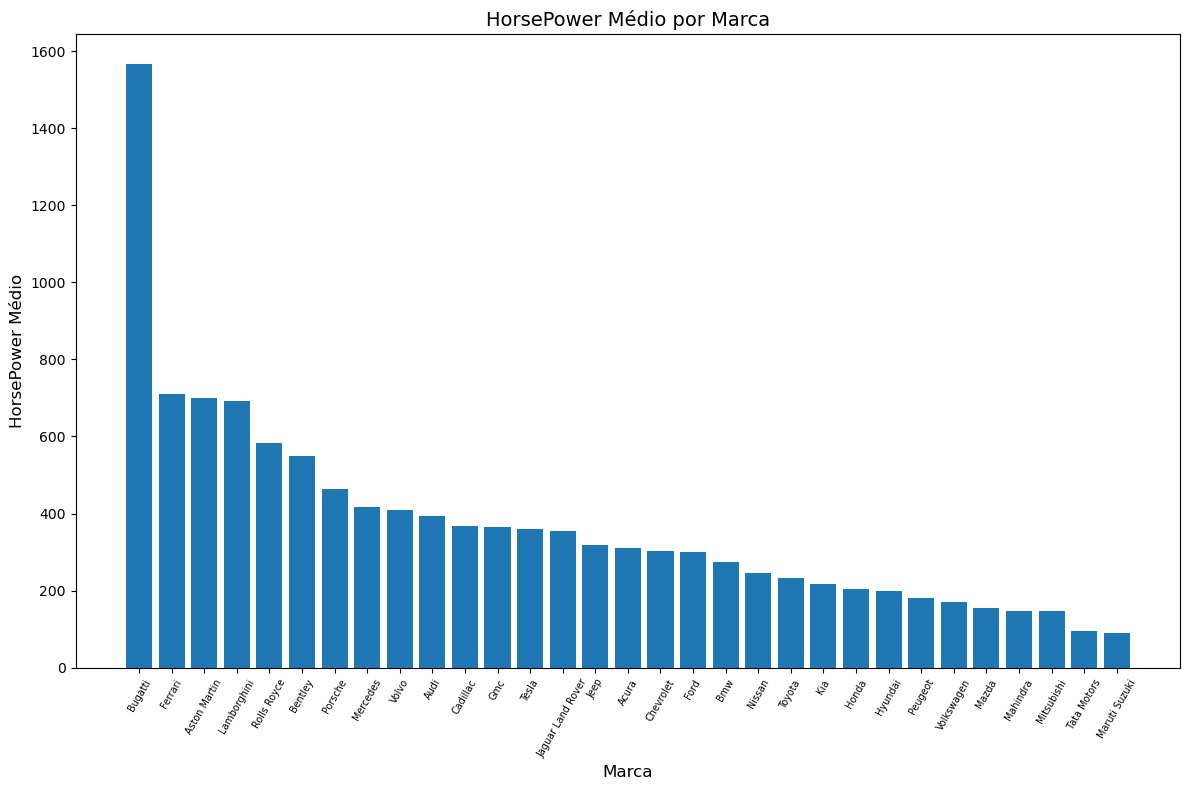

In [37]:
df_hpmedio_marcas = hpmedio_marcas['mean'].sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (12,8))

ax.bar(df_hpmedio_marcas.index, df_hpmedio_marcas.values)
ax.set_xlabel('Marca', fontsize = 12)
ax.set_ylabel('HorsePower Médio', fontsize = 12)
ax.set_title('HorsePower Médio por Marca', fontsize = 14)

plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 60, fontsize = 'x-small', )
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

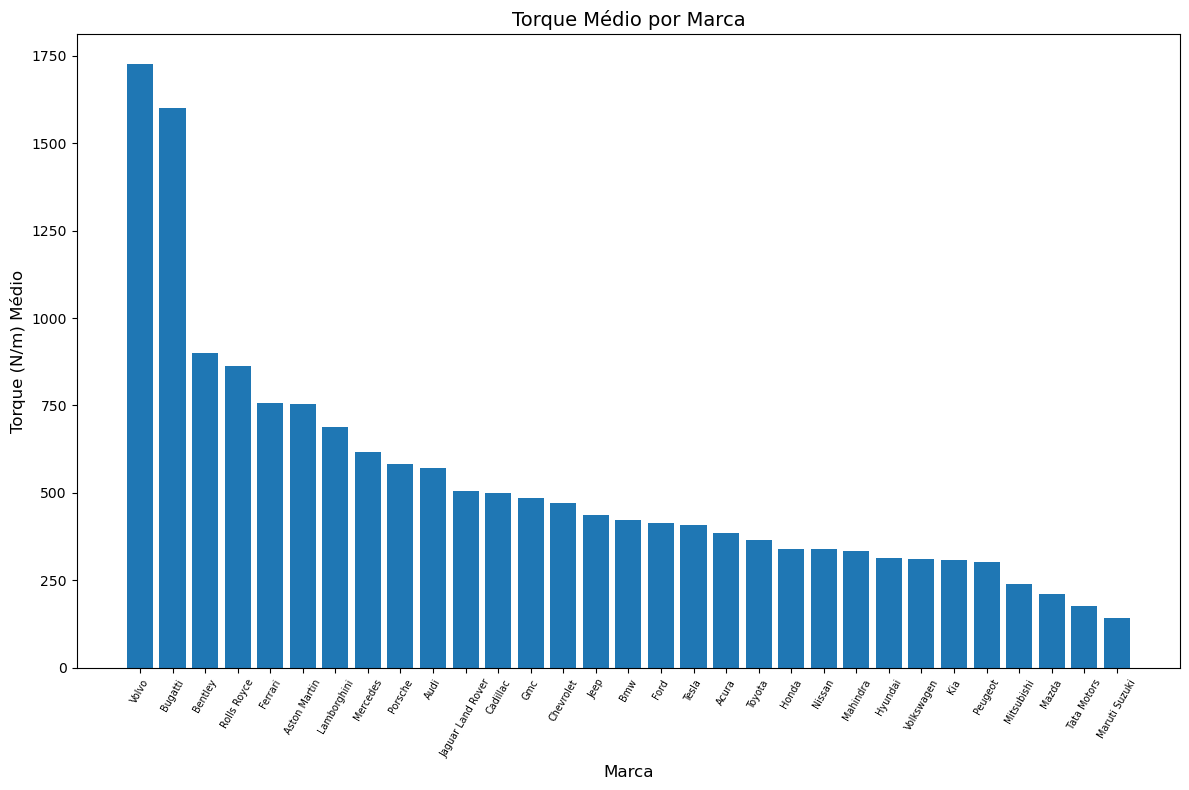

In [38]:
df_torquemedio_marcas = torquemedio_marcas['mean'].sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (12,8))

ax.bar(df_torquemedio_marcas.index, df_torquemedio_marcas.values)
ax.set_xlabel('Marca', fontsize = 12)
ax.set_ylabel('Torque (N/m) Médio', fontsize = 12)
ax.set_title('Torque Médio por Marca', fontsize = 14)

plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 60, fontsize = 'x-small', )
plt.tight_layout()
plt.show

## Velocidade Máxima

In [39]:
velocidademaxmedia_marcas = df_cleaned.groupby('Company Names')['TopSpeed_kmh'].describe()
velocidademaxmedia_marcas

count           mean           std  min    25%   50%  \
Company Names                                                             
Acura                 27 227.0740740741 39.6406220609  190    200   210   
Aston Martin          11            330   29.72204569  291    314   322   
Audi                  21 260.4761904762 36.6027581578  200    240   250   
Bentley                1            318           NaN  318    318   318   
Bmw                   41 240.4634146341 38.2851783077  185    213   230   
Bugatti               10            420 46.4279609239  350    390   420   
Cadillac              20         227.25 33.3827484599  190    210   210   
Chevrolet             57 200.5614035088 39.0727423915  150    180   200   
Ferrari                9 331.1111111111 10.5409255339  320    320   340   
Ford                  54 198.5925925926 37.0244786535  140    180   190   
Gmc                   59 188.5593220339 15.3704499143  170    175   190   
Honda                  7 209.7142857143 30.5544011326  180    193   201   
Hyundai               23            200 26.1116483934  160    180   200   
Jaguar Land Rover     40        249.575 30.5638360963  200    230   250   
Jeep                  19 190.4736842105 13.4881364377  160    180   190   
Kia                   71 206.7605633803 23.1006894076  180    190   200   
Lamborghini           24            334 18.2875581369  305    325   325   
Mahindra               3 173.3333333333 11.5470053838  160    170   180   
Maruti Suzuki          3 166.6666666667 11.5470053838  160    160   160   
Mazda                 86 183.7093023256 36.2617498293   85  162.5 182.5   
Mercedes              20            250             0  250    250   250   
Mitsubishi            56 178.7142857143 21.0814129988  120    170   180   
Nissan               158 202.7025316456 41.8376463962  110    175   200   
Peugeot               54 202.1296296296 31.1054483466  130    190   200   
Porsche               96      278.46875 29.7597230905  220 252.25   280   
Rolls Royce           30            250             0  250    250   250   
Tata Motors           28 155.0714285714 21.4077323715  105    140   160   
Tesla                 10          261.5 59.3618845164  209    219   250   
Toyota                49 194.4285714286 22.7788278891  130    180   200   
Volkswagen           107 203.4018691589 33.0496652605  130    180   205   
Volvo                 12 135.8333333333  55.178772818   80  107.5   115   

                     75%  max  
Company Names                  
Acura                250  307  
Aston Martin         334  402  
Audi                 305  330  
Bentley              318  318  
Bmw                  250  341  
Bugatti              420  500  
Cadillac           242.5  320  
Chevrolet            210  318  
Ferrari              340  340  
Ford               217.5  348  
Gmc                  200  210  
Honda              214.5  272  
Hyundai            217.5  240  
Jaguar Land Rover  252.5  320  
Jeep                 200  210  
Kia                  220  270  
Lamborghini          350  356  
Mahindra             180  180  
Maruti Suzuki        170  180  
Mazda              208.5  320  
Mercedes             250  250  
Mitsubishi           190  240  
Nissan               215  354  
Peugeot           223.75  250  
Porsche           300.25  340  
Rolls Royce          250  250  
Tata Motors          170  180  
Tesla             261.75  402  
Toyota               210  250  
Volkswagen         231.5  250  
Volvo                140  250

<function matplotlib.pyplot.show(close=None, block=None)>

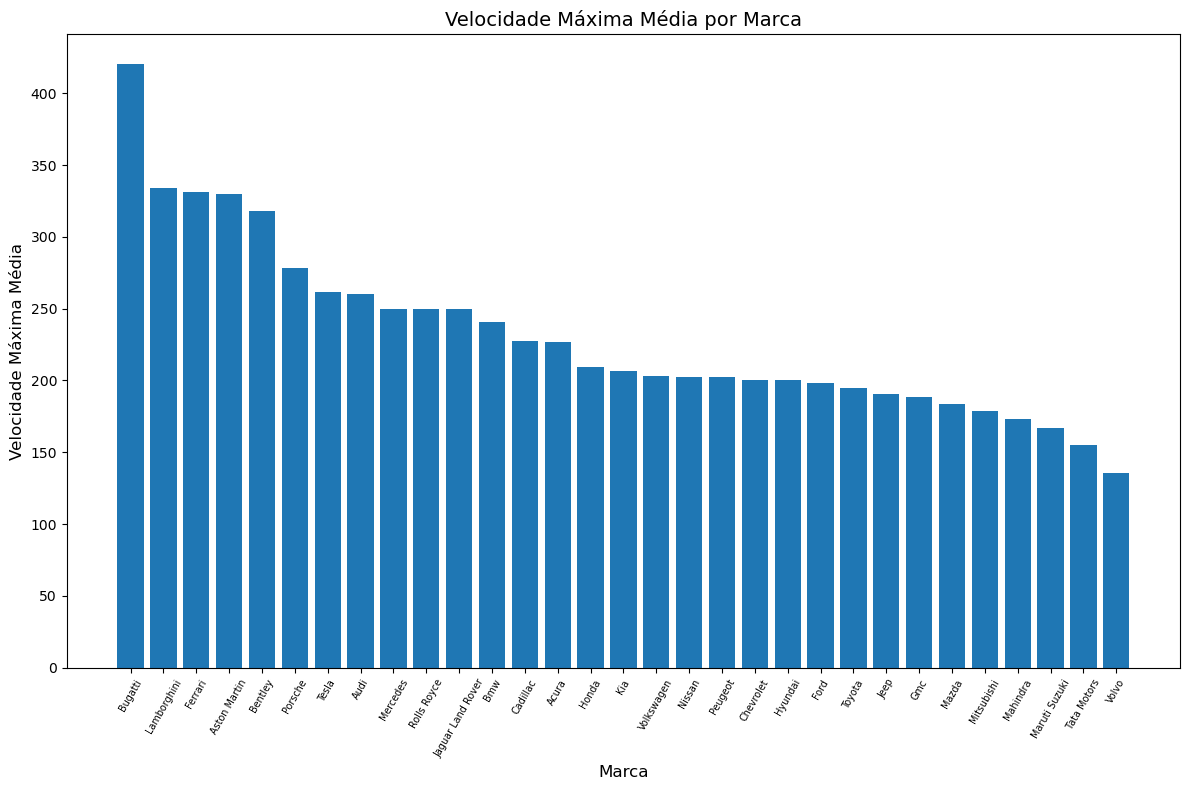

In [40]:
df_velocidademaxmedia_marcas = velocidademaxmedia_marcas['mean'].sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (12,8))

ax.bar(df_velocidademaxmedia_marcas.index, df_velocidademaxmedia_marcas.values)
ax.set_xlabel('Marca', fontsize = 12)
ax.set_ylabel('Velocidade Máxima Média', fontsize = 12)
ax.set_title('Velocidade Máxima Média por Marca', fontsize = 14)

plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 60, fontsize = 'x-small', )
plt.tight_layout()
plt.show

## Relação do tipo de motor e preço

In [41]:
tiposmotores = df_cleaned.groupby('Engines')['Price_USD'].describe()
tiposmotores

count              mean               std   min  \
Engines                                                                        
0.36L Inline-2                   1              9000               NaN  9000   
0.66L Inline-3                   1             11000               NaN 11000   
0.7L 3-Cylinder                  5             12000   1369.3063937629 11000   
1.0L EcoBoost / 1.5L             1             20000               NaN 20000   
1.0L EcoBoost / 1.5L / 2.0L      1             25000               NaN 25000   
...                            ...               ...               ...   ...   
V6 Petrol                        4             83750   4787.1355387817 80000   
V6 Turbocharged                  1             55000               NaN 55000   
V8                              34 225892.3529411765 240741.0258003127 39900   
V8 Gasoline Engine               2             48000  16970.5627484771 36000   
V8 Petrol                        8             99375  11475.9064378997 85000   

                               25%    50%    75%     max  
Engines                                                   
0.36L Inline-2                9000   9000   9000    9000  
0.66L Inline-3               11000  11000  11000   11000  
0.7L 3-Cylinder              11000  11000  13500   13500  
1.0L EcoBoost / 1.5L         20000  20000  20000   20000  
1.0L EcoBoost / 1.5L / 2.0L  25000  25000  25000   25000  
...                            ...    ...    ...     ...  
V6 Petrol                    80000  82500  86250   90000  
V6 Turbocharged              55000  55000  55000   55000  
V8                          108250 153500 241500 1100000  
V8 Gasoline Engine           42000  48000  54000   60000  
V8 Petrol                    90000 100000 102500  120000  

[350 rows x 8 columns]

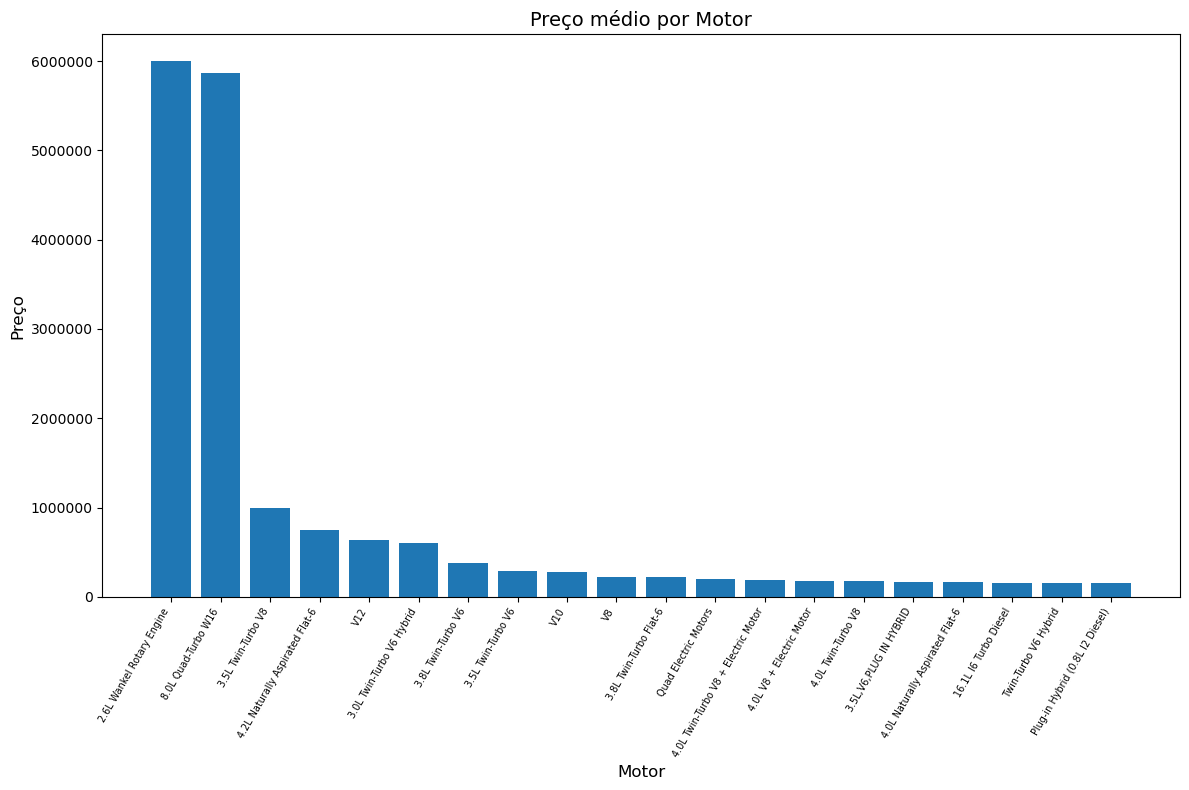

In [42]:
df_tiposmotores = tiposmotores['mean'].sort_values(ascending=False).head(20)

fig, ax  = plt.subplots(figsize = (12,8))

ax.bar(df_tiposmotores.index, df_tiposmotores.values)
ax.set_xlabel('Motor', fontsize = 12)
ax.set_ylabel('Preço', fontsize = 12)
ax.set_title('Preço médio por Motor', fontsize = 14)

plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 60, fontsize = 'x-small', ha = 'right')
plt.tight_layout()
plt.show()

In [43]:
motormaiscaro = tiposmotores['mean'].sort_values(ascending=False).index[0]
df_cleaned[df_cleaned['Engines'] == motormaiscaro]

Company Names       Cars Names                    Engines Fuel Types  \
1208         Mazda  787B (Race Car)  2.6L Wankel Rotary Engine     petrol   

      Engine_CC  HorsePower_hp  TopSpeed_kmh  (0-100khm) sec  Price_USD  \
1208       2620            700           320             3.5    6000000   

      Torque_Nm  Seats  Power Metric  Cost-Benefit  
1208        500      1          1200        0.0002

In [44]:
segundomotormaiscaro = tiposmotores['mean'].sort_values(ascending=False).index[1]
df_cleaned[df_cleaned['Engines'] == segundomotormaiscaro]

Company Names          Cars Names              Engines Fuel Types  \
876       Bugatti              Chiron  8.0L Quad-Turbo W16     petrol   
877       Bugatti    Chiron Pur Sport  8.0L Quad-Turbo W16     petrol   
878       Bugatti  Chiron Super Sport  8.0L Quad-Turbo W16     petrol   
879       Bugatti        Chiron Sport  8.0L Quad-Turbo W16     petrol   
880       Bugatti        Chiron Noire  8.0L Quad-Turbo W16     petrol   
881       Bugatti                Divo  8.0L Quad-Turbo W16     petrol   
882       Bugatti          Centodieci  8.0L Quad-Turbo W16     petrol   
883       Bugatti    La Voiture Noire  8.0L Quad-Turbo W16     petrol   
884       Bugatti              Bolide  8.0L Quad-Turbo W16     petrol   
885       Bugatti             Mistral  8.0L Quad-Turbo W16     petrol   

     Engine_CC  HorsePower_hp  TopSpeed_kmh  (0-100khm) sec  Price_USD  \
876       7993           1500           420             2.5    3000000   
877       7993           1500           350             2.3    3300000   
878       7993           1600           490             2.4    3500000   
879       7993           1500           420             2.4    3300000   
880       7993           1500           420             2.5    3300000   
881       7993           1500           380             2.4    5800000   
882       7993           1600           380             2.4    9000000   
883       7993           1500           420             2.5   18000000   
884       7993           1850           500             2.2    4500000   
885       7993           1600           420             2.4    5000000   

     Torque_Nm  Seats  Power Metric  Cost-Benefit  
876       1600      2          3100  0.0010333333  
877       1600      2          3100  0.0009393939  
878       1600      2          3200  0.0009142857  
879       1600      2          3100  0.0009393939  
880       1600      2          3100  0.0009393939  
881       1600      2          3100  0.0005344828  
882       1600      2          3200  0.0003555556  
883       1600      2          3100  0.0001722222  
884       1600      2          3450  0.0007666667  
885       1600      2          3200       0.00064

## Comparação entre combustíveis

## Combustão, Elétrico e Híbridos

## Potência

In [45]:
combustiveis = df_cleaned['Fuel Types'].unique()
combustiveis

array(['plug-in hybrid', 'petrol', 'diesel', 'hybrid', 'electric',
       'petrol & diesel', 'hydrogen', 'cng'], dtype=object)

In [46]:
horsepower_e_torque_por_combustiveis = df_cleaned.groupby('Fuel Types')[['HorsePower_hp', 'Torque_Nm']].describe()
print(horsepower_e_torque_por_combustiveis)

                HorsePower_hp                                              \
                        count           mean            std min   25% 50%   
Fuel Types                                                                  
cng                         1             86            NaN  86    86  86   
diesel                    102 203.1568627451 132.3194263742  61 125.5 163   
electric                   94 340.1170212766 211.5021470382   1   200 320   
hybrid                    105 298.9904761905 190.6562298624  68   181 227   
hydrogen                    3 154.6666666667   5.5075705473 151 151.5 152   
petrol                    871 309.2594718714 218.0013744535  26   150 272   
petrol & diesel            23 186.5652173913  92.7792228342  70   101 187   
plug-in hybrid              7 358.5714285714 274.9865797591 188 219.5 261   

                           Torque_Nm                                          \
                  75%  max     count           mean            std min  

In [47]:
df_horsepower_por_combustiveis = horsepower_e_torque_por_combustiveis['HorsePower_hp']
df_torque_por_combustiveis = horsepower_e_torque_por_combustiveis['Torque_Nm']

horsepower_mean = df_horsepower_por_combustiveis['mean']
torque_mean = df_torque_por_combustiveis['mean']
horsepower_std = df_horsepower_por_combustiveis['std']
torque_std = df_torque_por_combustiveis['std']

print(horsepower_mean)
print(torque_mean)

Fuel Types
cng                           86
diesel            203.1568627451
electric          340.1170212766
hybrid            298.9904761905
hydrogen          154.6666666667
petrol            309.2594718714
petrol & diesel   186.5652173913
plug-in hybrid    358.5714285714
Name: mean, dtype: float64
Fuel Types
cng                          113
diesel            550.8529411765
electric          440.9893617021
hybrid             424.780952381
hydrogen          356.6666666667
petrol            413.2537313433
petrol & diesel   335.6956521739
plug-in hybrid    397.1428571429
Name: mean, dtype: float64


In [48]:
bars_spacement = np.arange(len(combustiveis))
width = 0.35

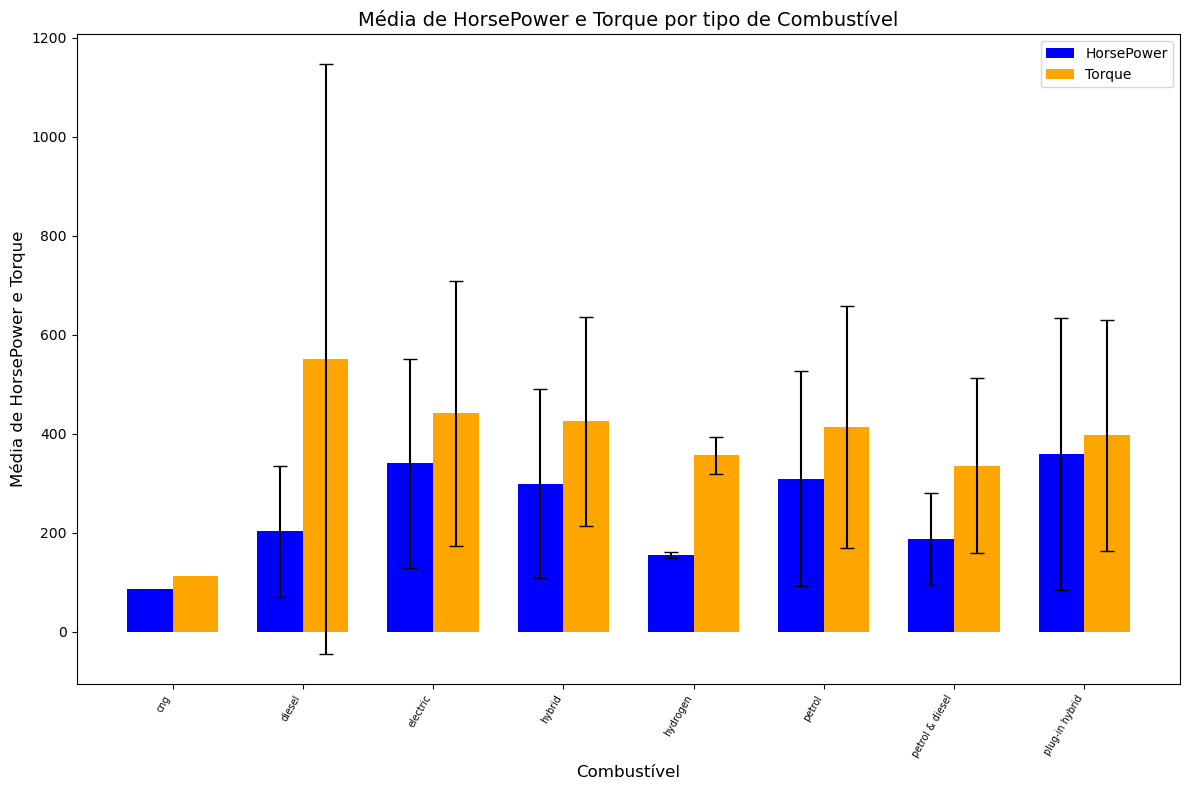

In [49]:
fig, ax = plt.subplots(figsize = (12,8))

ax.bar(bars_spacement - width/2, horsepower_mean, width, label = 'HorsePower',color = 'blue', yerr = horsepower_std, capsize = 5)
ax.bar(bars_spacement + width/2, torque_mean, width, label = 'Torque', color = 'orange', yerr = torque_std, capsize = 5)

ax.set_title('Média de HorsePower e Torque por tipo de Combustível', fontsize = 14)
ax.set_xlabel('Combustível', fontsize = 12)
ax.set_ylabel('Média de HorsePower e Torque', fontsize = 12)
ax.legend()

plt.xticks(ticks = bars_spacement, labels = horsepower_mean.index, rotation = 60, fontsize = 'x-small', ha = 'right')
plt.tight_layout()
plt.show()

## Preço

In [50]:
preco_por_combustiveis = df_cleaned.groupby('Fuel Types')['Price_USD'].describe()
preco_por_combustiveis

count              mean               std   min     25%  \
Fuel Types                                                                 
cng                  1             11800               NaN 11800   11800   
diesel             102   42275.637254902  26617.4488169054  6200   27625   
electric            94  69042.0744680851  37691.2213504268 11000 41112.5   
hybrid             105 128129.8333333333 421183.5912970924 15400   32500   
hydrogen             3  46633.3333333333   7615.9919467745 38000   43750   
petrol             871 161743.1331802526 825514.2853894805  4000   27000   
petrol & diesel     23  35460.8695652174  19805.6864912909  8300   17000   
plug-in hybrid       7 194657.1428571429 399478.7514463602 31100   36750   

                    50%     75%      max  
Fuel Types                                
cng               11800   11800    11800  
diesel            35000   47000   160000  
electric        59997.5 89622.5   200000  
hybrid            44000   55000  3200000  
hydrogen          49500   50950    52400  
petrol            42100   75200 18000000  
petrol & diesel   35000   55000    60000  
plug-in hybrid    41000   58500  1100000

In [51]:
df_preco_por_combustiveis = preco_por_combustiveis['mean'].sort_values(ascending = False)
preco_mean = preco_por_combustiveis['mean']
preco_mean

Fuel Types
cng                           11800
diesel              42275.637254902
electric           69042.0744680851
hybrid            128129.8333333333
hydrogen           46633.3333333333
petrol            161743.1331802526
petrol & diesel    35460.8695652174
plug-in hybrid    194657.1428571429
Name: mean, dtype: float64

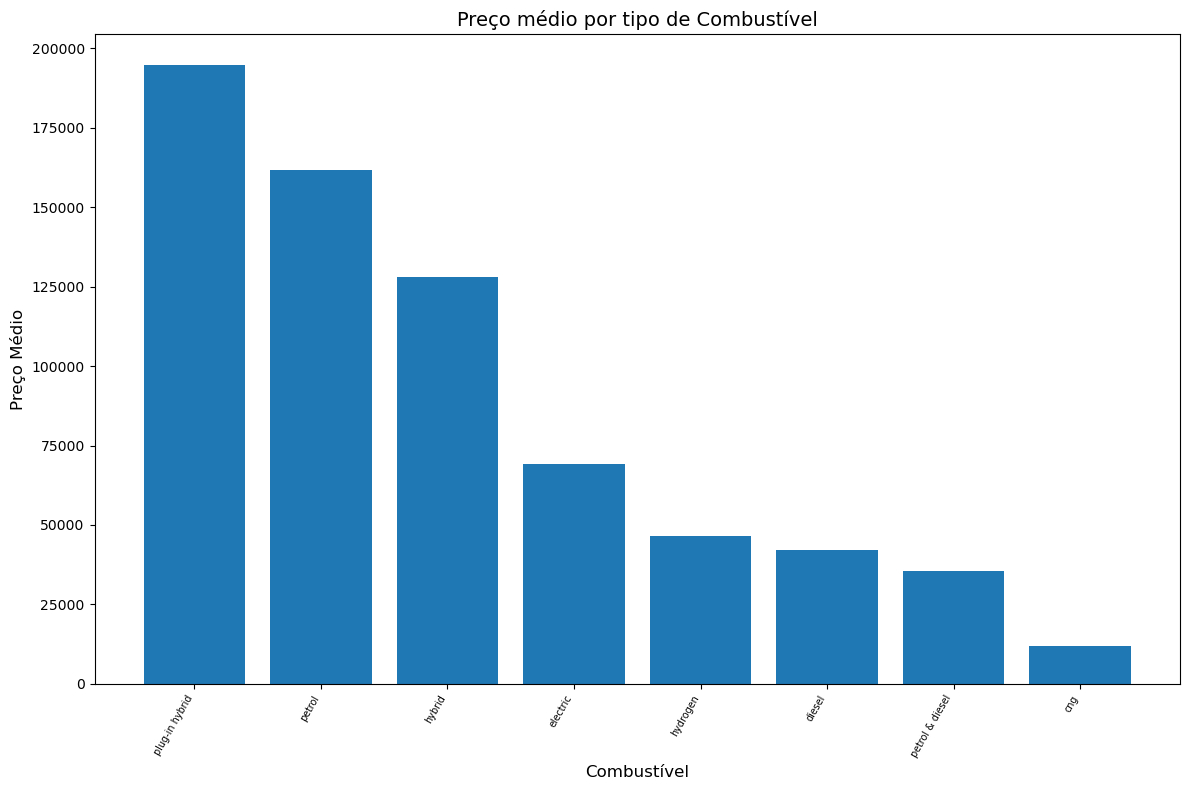

In [52]:
fig, ax = plt.subplots(figsize = (12,8))

ax.bar(df_preco_por_combustiveis.index, df_preco_por_combustiveis.values)
ax.set_title('Preço médio por tipo de Combustível', fontsize = 14)
ax.set_xlabel('Combustível', fontsize = 12)
ax.set_ylabel('Preço Médio', fontsize = 12)

plt.xticks(rotation = 60, size = 'x-small', ha = 'right')
plt.tight_layout()
plt.show()

## Performance 0-100 km/h

In [53]:
performance_por_combustiveis = df_cleaned.groupby('Fuel Types')['(0-100khm) sec'].describe()
performance_por_combustiveis

count          mean          std  min   25%  50%   75%  max
Fuel Types                                                                  
cng                  1            12          NaN   12    12   12    12   12
diesel             102 11.4617647059 3.1707526082  6.3 8.875   11    13   22
electric            94  5.9138297872 2.5787219083  1.9 4.025 5.15 7.475   15
hybrid             105  7.1380952381 2.3287245169  2.5     6  7.5   8.5   12
hydrogen             3  8.6666666667 0.7571877794  7.8   8.4    9   9.1  9.2
petrol             871  7.2769230769 3.1601153321  2.2   5.1  6.8   8.9   35
petrol & diesel     23  9.6608695652 3.3850928724    5   6.5   10  12.1   17
plug-in hybrid       7  6.6714285714 2.5250176803  2.5  5.55  6.7  7.95 10.5

In [54]:
df_performance_por_combustiveis = performance_por_combustiveis['mean'].sort_values(ascending = False)
performance_mean = performance_por_combustiveis['mean']
df_performance_por_combustiveis

Fuel Types
cng                          12
diesel            11.4617647059
petrol & diesel    9.6608695652
hydrogen           8.6666666667
petrol             7.2769230769
hybrid             7.1380952381
plug-in hybrid     6.6714285714
electric           5.9138297872
Name: mean, dtype: float64

In [55]:
performance_mean

Fuel Types
cng                          12
diesel            11.4617647059
electric           5.9138297872
hybrid             7.1380952381
hydrogen           8.6666666667
petrol             7.2769230769
petrol & diesel    9.6608695652
plug-in hybrid     6.6714285714
Name: mean, dtype: float64

Text(0.5, 1.0, 'Performance 0-100 km/h por tipo de Combustível')

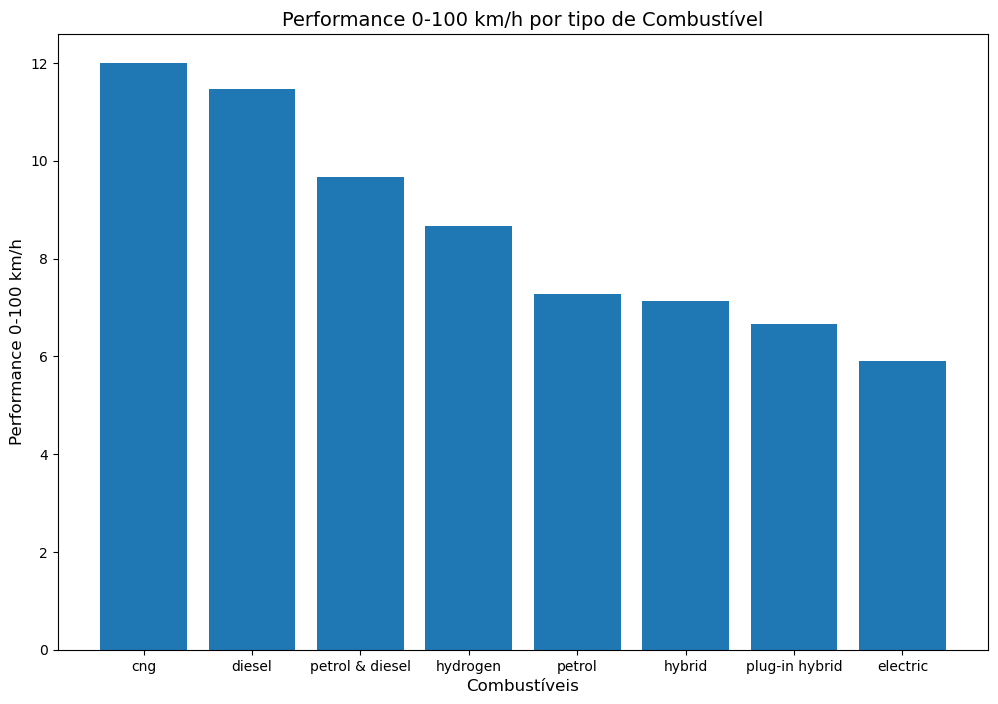

In [56]:
fig, ax = plt.subplots(figsize = (12,8))

ax.bar(df_performance_por_combustiveis.index, df_performance_por_combustiveis.values)
ax.set_xlabel('Combustíveis', fontsize = 12)
ax.set_ylabel('Performance 0-100 km/h', fontsize = 12)
ax.set_title('Performance 0-100 km/h por tipo de Combustível', fontsize = 14)

## Análise comparativa entre Potência, Preço e Performance para cada tipo de Combustível

In [57]:
scaler = MinMaxScaler()

horsepower_normalizado = scaler.fit_transform(horsepower_mean.values.reshape(-1,1))
torque_normalizado = scaler.fit_transform(torque_mean.values.reshape(-1,1))
preco_normalizado = scaler.fit_transform(preco_mean.values.reshape(-1,1))
performance_normalizado = scaler.fit_transform(performance_mean.values.reshape(-1,1))

df_normalized = pd.DataFrame()
df_normalized['Combustível'] = performance_mean.index
df_normalized['HorsePower'] = horsepower_normalizado.flatten()
df_normalized['Torque'] = torque_normalizado.flatten()
df_normalized['Preço'] = preco_normalizado.flatten()
df_normalized['Performance'] = 1 - performance_normalizado.flatten()

df_normalized

Combustível   HorsePower       Torque        Preço  Performance
0              cng            0            0            0            0
1           diesel 0.4298207753            1 0.1666636412 0.0884357938
2         electric 0.9322951514 0.7490856652 0.3130425947            1
3           hybrid 0.7814116003 0.7120677357  0.636178776 0.7988446908
4         hydrogen 0.2519217331  0.556503437 0.1904947917 0.5476897978
5           petrol 0.8190861127 0.6857410402 0.8200015096 0.7760343135
6  petrol & diesel  0.368949959 0.5086083277 0.1293953804 0.3843353625
7   plug-in hybrid            1 0.6489458684            1 0.8755212625

In [58]:
horsepower_mean.values

array([ 86.        , 203.15686275, 340.11702128, 298.99047619,
       154.66666667, 309.25947187, 186.56521739, 358.57142857])

In [59]:
fig = go.Figure()

fuel_types = df_normalized['Combustível']
fig.add_trace(go.Scatterpolar(
              r = df_normalized['HorsePower'],
              theta = fuel_types,
              fill='toself',
              name='HorsePower',
              opacity = 0.7,
              customdata = horsepower_mean.values.reshape(-1,1),
              hovertemplate = '<b>Horse Power: %{customdata:.2f}<b>'
))

fig.add_trace(go.Scatterpolar(
              r = df_normalized['Torque'],
              theta = fuel_types,
              fill='toself',
              name='Torque',
              opacity = 0.7,
              customdata = torque_mean.values.reshape(-1,1),
              hovertemplate = '<b>Torque: %{customdata:.2f}<b>'
))

fig.add_trace(go.Scatterpolar(
              r = df_normalized['Preço'],
              theta = fuel_types,
              fill='toself',
              name='Preço',
              opacity = 0.7,
              customdata = preco_mean.values.reshape(-1,1),
              hovertemplate = '<b>Preço: %{customdata:.2f}<b>'
))

fig.add_trace(go.Scatterpolar(
              r = df_normalized['Performance'],
              theta = fuel_types,
              fill='toself',
              name='Performance (0-100km/h)',
              opacity = 0.7,
              customdata = performance_mean.values.reshape(-1,1),
              hovertemplate = '<b>Performance: %{customdata:.2f}<b>'
))

fig.update_layout(
    width=800,  
    height=600,
    polar=dict(
    radialaxis=dict(
      visible=True,
      showticklabels=False
    ))
)

fig.show()